In [1]:
import jax.numpy as jnp
import jax.random as random
from flax import optim
from modax.training import create_update, train_max_iter
from nf import NormalizingFlow
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%load_ext autoreload
%autoreload 2

In [2]:
key = random.PRNGKey(42)
# Making sample dataset
n_samples = 100
n_dims = 1
x_samples = 0.5 * random.normal(key, (n_samples, n_dims))

In [3]:
def loss_fn(params, state, model, x):
    log_p = model.apply(params, x)
    loss = -jnp.sum(log_p)
    metrics = {"loss": loss}
    return loss, (state, metrics, log_p)

In [4]:
# Initializing model
model = NormalizingFlow(10)
params = model.init(key, x_samples)
optimizer_def = optim.Adam(learning_rate=2e-3, beta1=0.99, beta2=0.99)
optimizer = optimizer_def.create(params)

# Compiling train step
update = create_update(loss_fn, (model, x_samples))

In [5]:
optimizer, _ = train_max_iter(update, optimizer, None, 5000)


Loss step 0: 596.0853271484375
Loss step 500: 109.53028869628906
Loss step 1000: 75.07597351074219
Loss step 1500: 70.94039154052734
Loss step 2000: 69.32939147949219
Loss step 2500: 68.82476806640625
Loss step 3000: 68.56381225585938
Loss step 3500: 68.38976287841797
Loss step 4000: 68.31812286376953
Loss step 4500: 68.23841857910156


In [6]:
x_grid = jnp.linspace(-5, 5, 100)

In [7]:
log_p = model.apply(optimizer.target, x_grid[:, None])
p = jnp.exp(log_p)

<AxesSubplot:ylabel='Density'>

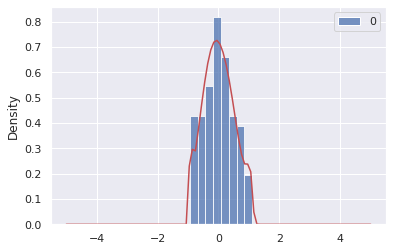

In [8]:
plt.plot(x_grid, p, color='r')
sns.histplot(x_samples, stat='density')

In [ ]:
68.21